In [1]:
import psutil
import GPUtil
import time

def get_cpu_usage():
    return psutil.cpu_percent(interval=1)

def get_memory_usage():
    return psutil.virtual_memory().percent

def get_gpu_usage():
    gpus = GPUtil.getGPUs()
    if gpus:
        gpu = gpus[0]
        return gpu.load * 100, gpu.memoryUtil * 100
    return None, None

def monitor_power_usage(duration=10):
    cpu_usage = []
    memory_usage = []
    gpu_usage = []
    gpu_memory_usage = []

    start_time = time.time()
    while time.time() - start_time < duration:
        cpu_usage.append(get_cpu_usage())
        memory_usage.append(get_memory_usage())
        
        gpu, gpu_memory = get_gpu_usage()
        if gpu is not None:
            gpu_usage.append(gpu)
            gpu_memory_usage.append(gpu_memory)
        
        time.sleep(1)
    
    return cpu_usage, memory_usage, gpu_usage, gpu_memory_usage

In [15]:
from TTS.api import TTS
tts = TTS("tts_models/multilingual/multi-dataset/xtts_v2", gpu=True)
tts.to(0)


cpu_usage, memory_usage, gpu_usage, gpu_memory_usage = monitor_power_usage(10)
tts.tts(text='Ciao amico mio come stai, io sinceramente non sono più sicuro di essere vivo.', speaker_wav='../backend/input/it.wav', language='it')



 > tts_models/multilingual/multi-dataset/xtts_v2 is already downloaded.
 > Using model: xtts
 > Text splitted to sentences.
['Ciao amico mio come stai, io sinceramente non sono più sicuro di essere vivo.']
 > Processing time: 2.171865940093994
 > Real-time factor: 0.3617917017638143


[0.0051390477,
 -0.0017262492,
 -0.010060965,
 -0.0022987828,
 0.0017079859,
 -0.002835147,
 0.0025755365,
 0.008292464,
 0.0010238015,
 -0.0069554783,
 -0.012499308,
 -0.015627403,
 -0.0020366088,
 0.0022373148,
 0.015393701,
 0.0096172895,
 -0.007229046,
 -0.013335135,
 -0.0010833342,
 0.0016890178,
 0.0047362796,
 0.005001915,
 0.01505835,
 0.0070388718,
 0.019378362,
 -0.003652456,
 -0.01942546,
 -0.005291198,
 0.003964334,
 0.010931875,
 0.023580348,
 0.021361634,
 0.0027797308,
 -0.00824299,
 -0.01441642,
 -0.009330908,
 -0.00788851,
 0.002304375,
 0.0153258275,
 0.023866827,
 0.02312211,
 0.0028497337,
 -0.008513028,
 -0.017675577,
 -0.02173343,
 -0.011879932,
 0.008815604,
 0.020957824,
 0.008182913,
 0.00827801,
 0.0032235396,
 -0.007636808,
 -0.019639714,
 -0.017274266,
 -0.005901091,
 0.018223291,
 0.027838787,
 0.015997652,
 -0.010901742,
 -0.023898998,
 -0.010910903,
 0.004729903,
 0.00016633052,
 -0.012206809,
 -0.022006385,
 -0.021782,
 0.0010021674,
 0.02097333,
 0.0242

In [12]:
print(cpu_usage)

[50.1, 49.4, 49.3, 49.8, 51.1]


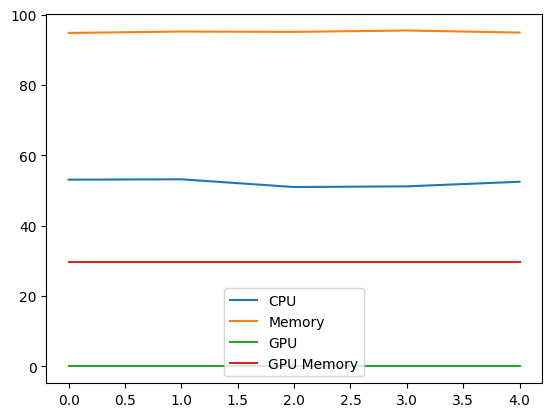

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
#plot all metrics
plt.plot(cpu_usage, label='CPU')
plt.plot(memory_usage, label='Memory')
plt.plot(gpu_usage, label='GPU')
plt.plot(gpu_memory_usage, label='GPU Memory')

plt.legend()
plt.show()